<a href="https://colab.research.google.com/github/kota-Git/Book_Recommendation_systems/blob/main/Book_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
books_df=pd.read_csv("/content/drive/MyDrive/Books.csv")

rating_df=pd.read_csv("/content/drive/MyDrive/Ratings.csv")

users_df=pd.read_csv("/content/drive/MyDrive/Users.csv")





##**Understanding_of_Data**

In [ ]:

books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books_df.shape

(271358, 8)

In [ ]:
books_df.iloc[237]['Image-URL-L']

'http://images.amazon.com/images/P/0671027387.01.LZZZZZZZ.jpg'

In [ ]:
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# Dataset Rows & Columns count

print(f"Books has {books_df.shape[0]} rows and {books_df.shape[1]} columns " )
print(f"Rating has {rating_df.shape[0]} rows and {rating_df.shape[1]} columns " )
print(f"Users has {users_df.shape[0]} rows and {users_df.shape[1]} columns " )

Books has 271360 rows and 8 columns 
Rating has 1149780 rows and 3 columns 
Users has 278858 rows and 3 columns 


# Dataset Information

In [ ]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


# **Checking Data types**

In [ ]:
books_df.dtypes

,0
ISBN,object
Book-Title,object
Book-Author,object
Year-Of-Publication,object
Publisher,object
Image-URL-S,object
Image-URL-M,object
Image-URL-L,object


In [ ]:
rating_df.dtypes

,0
User-ID,int64
ISBN,object
Book-Rating,int64


In [ ]:
users_df.dtypes

,0
User-ID,int64
Location,object
Age,float64


In [ ]:
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

# we can see that wrong inputs in year of publications such as  'DK Publishing Inc', 'Gallimard'

In [ ]:
# checking the data where the 'Year-Of-Publication' is 'DK Publishing Inc'
books_df.loc[books_df['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


We can notice that the Book-Author ,Year-of-Publication , Book-Author and Publisher columns are exchanged with each others and publication column contain image links

we need to find the Book-Author on our own for the book DK Readers: Creating the X-Men, How It All Beg.. and DK Readers: Creating the X-Men, How Comic Book..

In [ ]:
#Fixing the wrongly inputed values
#ISBN '0789466953'
books_df.loc[books_df.ISBN == '0789466953','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '0789466953','Book-Author'] = "James Buckley" # this we gathered from the google
books_df.loc[books_df.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books_df.loc[books_df.ISBN == '078946697X','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum" # this we gathered from the google
books_df.loc[books_df.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [ ]:
# checking for the Gallimard
books_df.loc[books_df['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


Here also we can see that Book-Author, year-of-publication and publishers values are interchnaged and publishers actual name is missing

In [ ]:
books_df.loc[books_df.ISBN == '2070426769','Year-Of-Publication'] = 2003
books_df.loc[books_df.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books_df.loc[books_df.ISBN == '2070426769','Publisher'] = "Gallimard"
books_df.loc[books_df.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [ ]:
# Rechecking the correction made
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(int)

In [ ]:

# Replacing invalid values such as year greateer than 2022 and year having 0 with the NaN
# so that we can fill those null values with proper measure of centreal tendency

books_df.loc[(books_df['Year-Of-Publication'] > 2022) | (books_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

# filling the null values with median values as there are outliers in year-of-publication column
books_df['Year-Of-Publication'].fillna(round(books_df['Year-Of-Publication'].median()),inplace=True)



In [ ]:
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(int)

In [ ]:
books_df.dtypes

,0
ISBN,object
Book-Title,object
Book-Author,object
Year-Of-Publication,int64
Publisher,object
Image-URL-S,object
Image-URL-M,object
Image-URL-L,object


# Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
# Missing Values/Null Values Count
print("Duplicate Values in BOOKS" ,len(books_df[books_df.duplicated()]))
print("Duplicate Values in RATINGS ",len(rating_df[rating_df.duplicated()]))
print("Duplicate Values in USERS",len(users_df[users_df.duplicated()]))

Duplicate Values in BOOKS 0
Duplicate Values in RATINGS  0
Duplicate Values in USERS 0


# Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("NULL Values in BOOKS" ,books_df.isnull().sum())
print('\n')
print("NULL Values in RATINGS ",rating_df.isnull().sum())
print('\n')
print("NULL Values in USERS",users_df.isnull().sum())

NULL Values in BOOKS ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


NULL Values in RATINGS  User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


NULL Values in USERS User-ID          0
Location         0
Age         110762
dtype: int64


<Figure size 1000x600 with 0 Axes>

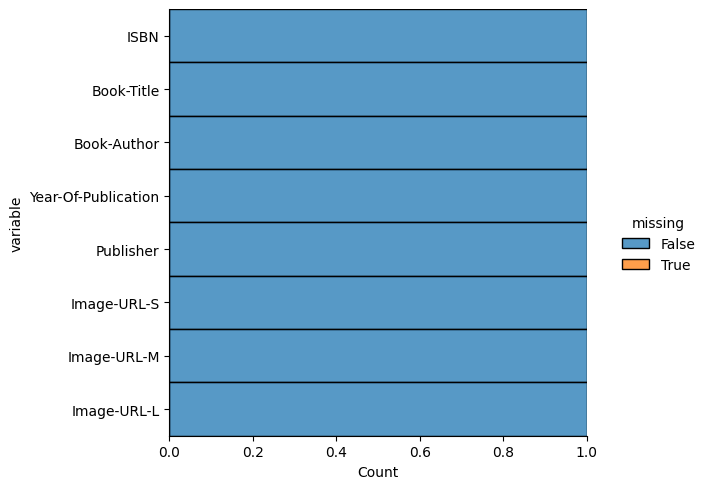

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=books_df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
);

In [ ]:
#Drop rows with missing ISBN, Book-Title, or Book-Author
books_df = books_df.dropna(subset=['ISBN', 'Book-Title', 'Book-Author'])

In [ ]:
# Fill missing Publisher values with a placeholder
books_df['Publisher'].fillna('Unknown', inplace=True)

In [ ]:
# Fill missing image URLs with a placeholder
books_df['Image-URL-L'].fillna('No Image Available', inplace=True)

In [ ]:
books_df.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [ ]:
users_df['Age'].fillna(users_df['Age'].median(), inplace=True)

#Understanding Your Variables

In [ ]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
rating_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [ ]:
users_df.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

#**Statistical analysis**

In [ ]:
books_df.describe().T



,count,mean,std,min,25%,50%,75%,max
Year-Of-Publication,271358.0,1993.727349,8.255338,1376.0,1989.0,1996.0,2000.0,2021.0


In [ ]:

rating_df.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1149780.0,140386.395126,80562.277719,2.0,70345.0,141010.0,211028.0,278854.0
Book-Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


In [ ]:

users_df.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,278858.0,139429.500000,80499.515020,1.0,69715.25,139429.5,209143.75,278858.0
Age,278858.0,33.658568,11.282618,0.0,29.00,32.0,35.00,244.0


Variables Description

Books are identified by their respective ISBN. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher) are obtained from Amazon Web Services.


URLs linking to cover images are also given,It has basicaly three flovors of images (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.


Users variables

The average age of the users of books reader is 34-35
Ratings variables

The average rating given by the user is 2.8669 out of 10
Range of rating is 0-10
Books variables

There are total 102023 unique Authors listed in this dataset
Top publisher which has largest number of books listed in this dataset is Harlequin
There are 16807 unique publishers listed in this Dataset

#**Handling Outliers**

<Axes: xlabel='Age'>

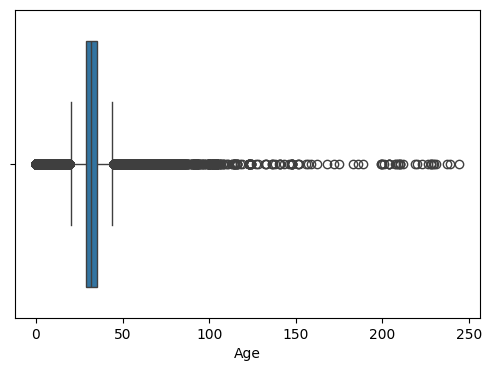

In [ ]:
# chceking the outliers again
fig = plt.figure(figsize=(6,4))
sns.boxplot(x='Age',data=users_df)

In [ ]:
# Handling Outliers & Outlier treatments
Q3,Q1 = np.percentile(users_df['Age'],[75,25])
#Calculating Inter Quartile Range
IQR = Q3-Q1
#Fixing Boundaries for outliers
max = Q3+(1.5*IQR)
min = Q1-(1.5*IQR)
users_df["Age"] = np.where(users_df["Age"] > max, max, users_df['Age'])
users_df["Age"] = np.where(users_df["Age"] < min, min, users_df['Age'])

<Axes: xlabel='Age'>

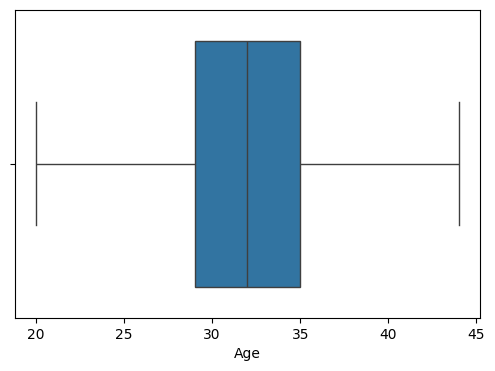

In [ ]:
# chceking the outliers again
fig = plt.figure(figsize=(6,4))
sns.boxplot(x='Age',data=users_df)

We can notice that the Outliers has been handeled smoothly and now we dont have any outliers
What all outlier treatment techniques have you used and why did you use those techniques?
We used IQR method to fill the right side otliers with maximum value calculated from IQR and Left side outliers with the minimum value calculated from IQR

#**Check Unique Values for each variable**

In [ ]:
books_df.nunique()

,0
ISBN,271358
Book-Title,242133
Book-Author,102020
Year-Of-Publication,109
Publisher,16803
Image-URL-S,271042
Image-URL-M,271042
Image-URL-L,271040


In [ ]:
rating_df.nunique()

,0
User-ID,105283
ISBN,340556
Book-Rating,11


In [ ]:
users_df.nunique()

,0
User-ID,278858
Location,57339
Age,25


#**Data Wrangling**

In [ ]:
# Write your code to make your dataset analysis ready.
# first we have to merge the datsets
rating_with_books=books_df.merge(rating_df,on="ISBN")

rating_with_books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0


#**Checking the percentage of books which have 0 rating**

In [ ]:
print(f'there are {(len(rating_with_books[rating_with_books["Book-Rating"]==0])/len(rating_with_books))*100} of the books which have 0 rating' )

there are 62.77496426264676 of the books which have 0 rating


In [ ]:
rating_with_books_copy=rating_with_books.copy()

In [ ]:
# we can also drop the book details where the ratings is 0 as it is not a valid rating
rating_with_books_copy.drop(index=rating_with_books_copy[rating_with_books_copy["Book-Rating"]==0].index,inplace=True)


In [ ]:
rating_with_books_copy.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8


In [ ]:
# we can remove the medium and small scale of a image link i.e Image-URL-S and Image-URL-M
rating_with_books_copy.drop(columns=["Image-URL-S","Image-URL-M"],axis=1,inplace=True)

In [ ]:
rating_with_books_copy.shape

(383840, 8)

In [ ]:
rating_with_books_copy.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-L,0
User-ID,0
Book-Rating,0


In [ ]:
# Write your code to make your dataset analysis ready.
# first we have to merge the datsets
rating_books_with_user=rating_with_books_copy.merge(users_df,on="User-ID")

rating_books_with_user.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",32.0
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,8,5,"timmins, ontario, canada",32.0
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,8,5,"timmins, ontario, canada",32.0


In [ ]:
rating_books_with_user.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-L,0
User-ID,0
Book-Rating,0
Location,0
Age,0


In [ ]:
rating_books_with_user.shape

(383840, 10)

In [ ]:
rating_books_with_user.duplicated().sum()

0

In [ ]:
rating_books_with_user.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-L,0
User-ID,0
Book-Rating,0
Location,0
Age,0


In [ ]:
rating_books_with_user.dtypes

,0
ISBN,object
Book-Title,object
Book-Author,object
Year-Of-Publication,int64
Publisher,object
Image-URL-L,object
User-ID,int64
Book-Rating,int64
Location,object
Age,float64


##**Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#**Univariate analysis**

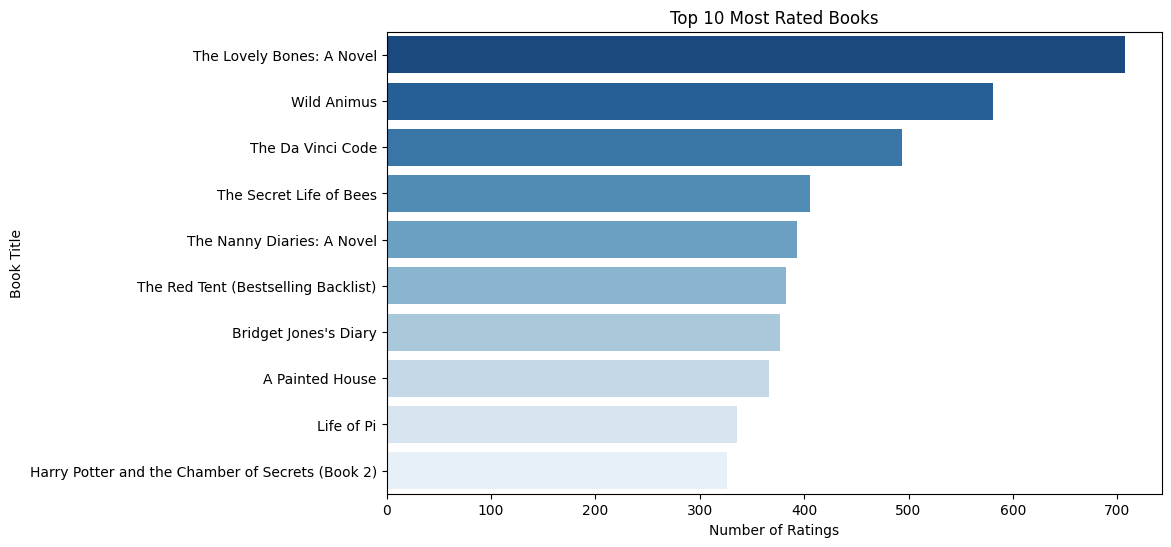

In [ ]:
# Top 10 Most Rated Books
plt.figure(figsize=(10, 6))
top_rated_books = rating_books_with_user['Book-Title'].value_counts().head(10)
sns.barplot(y=top_rated_books.index, x=top_rated_books.values, palette='Blues_r')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.show()

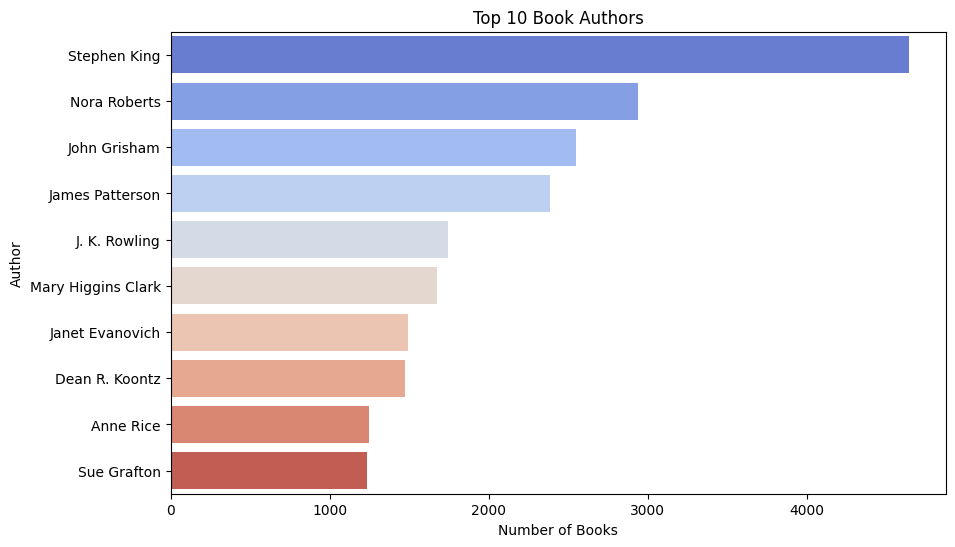

In [ ]:
# c. Top 10 Most Common Book Authors
plt.figure(figsize=(10, 6))
top_authors = rating_books_with_user['Book-Author'].value_counts().head(10)
sns.barplot(y=top_authors.index, x=top_authors.values, palette='coolwarm')
plt.title('Top 10 Book Authors')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

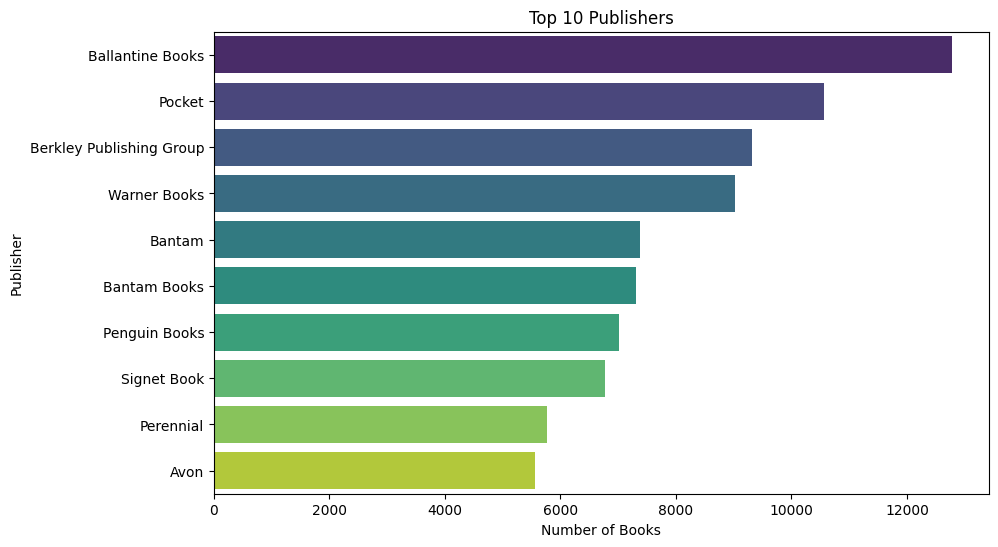

In [ ]:
# . Top 10 Publishers (if the Publisher column exists)
plt.figure(figsize=(10, 6))
top_publishers = rating_books_with_user['Publisher'].value_counts().head(10)
sns.barplot(y=top_publishers.index, x=top_publishers.values, palette='viridis')
plt.title('Top 10 Publishers')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()

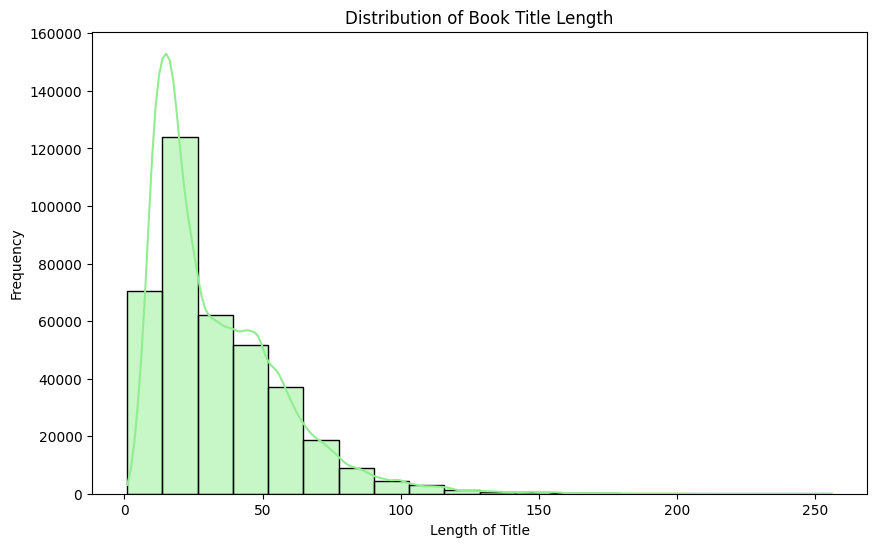

In [ ]:
#  Distribution of Book Titles by Length of Title
plt.figure(figsize=(10, 6))
rating_books_with_user['title_length'] = rating_books_with_user['Book-Title'].apply(lambda x: len(x))
sns.histplot( rating_books_with_user['title_length'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Book Title Length')
plt.xlabel('Length of Title')
plt.ylabel('Frequency')
plt.show()

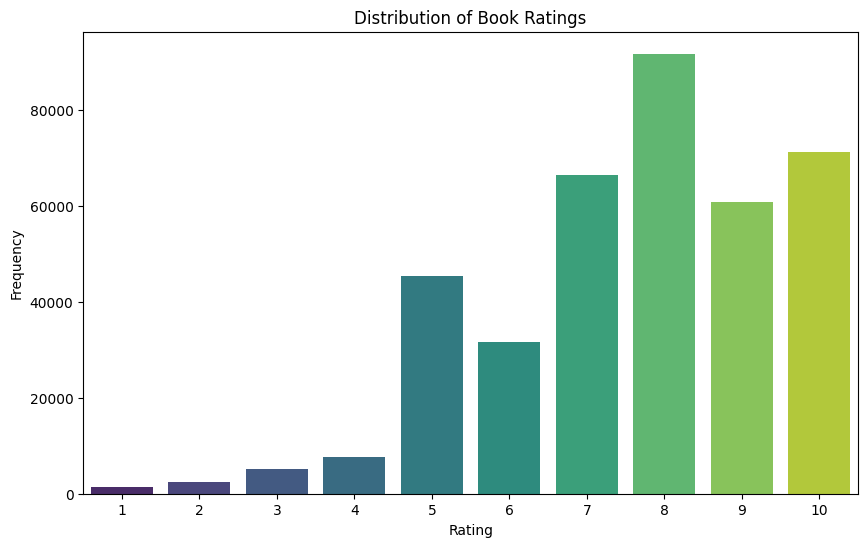

In [ ]:
#  Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Book-Rating', data=rating_books_with_user, palette='viridis')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

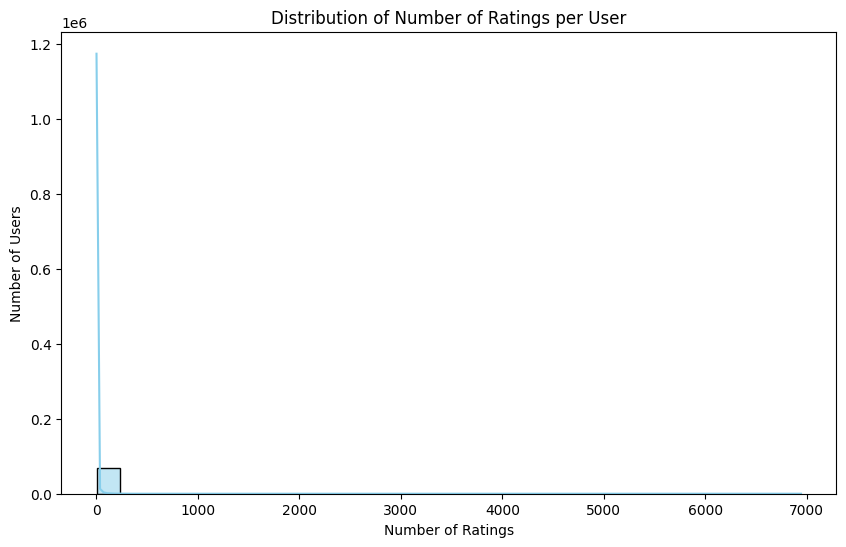

In [ ]:
# Analyzing unique users who provided ratings
plt.figure(figsize=(10, 6))
sns.histplot(rating_books_with_user['User-ID'].value_counts(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

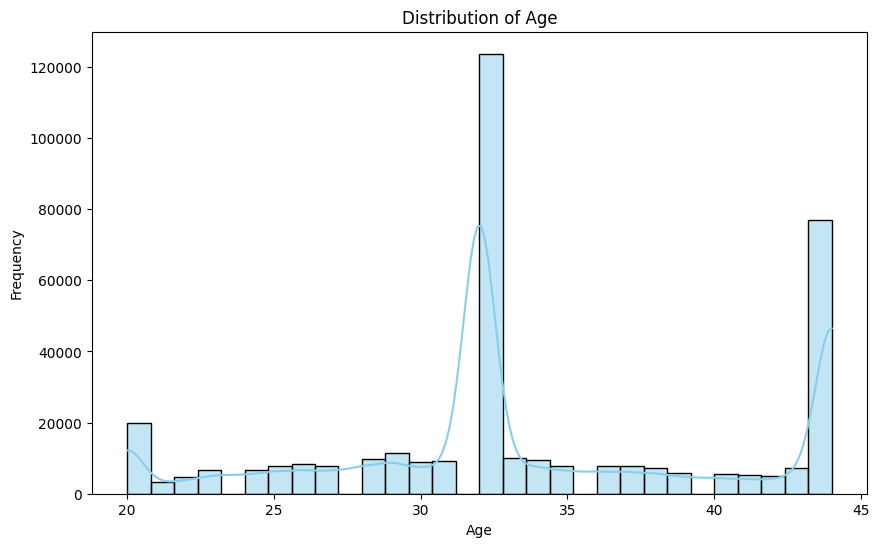

In [ ]:
# Plotting the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(rating_books_with_user['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


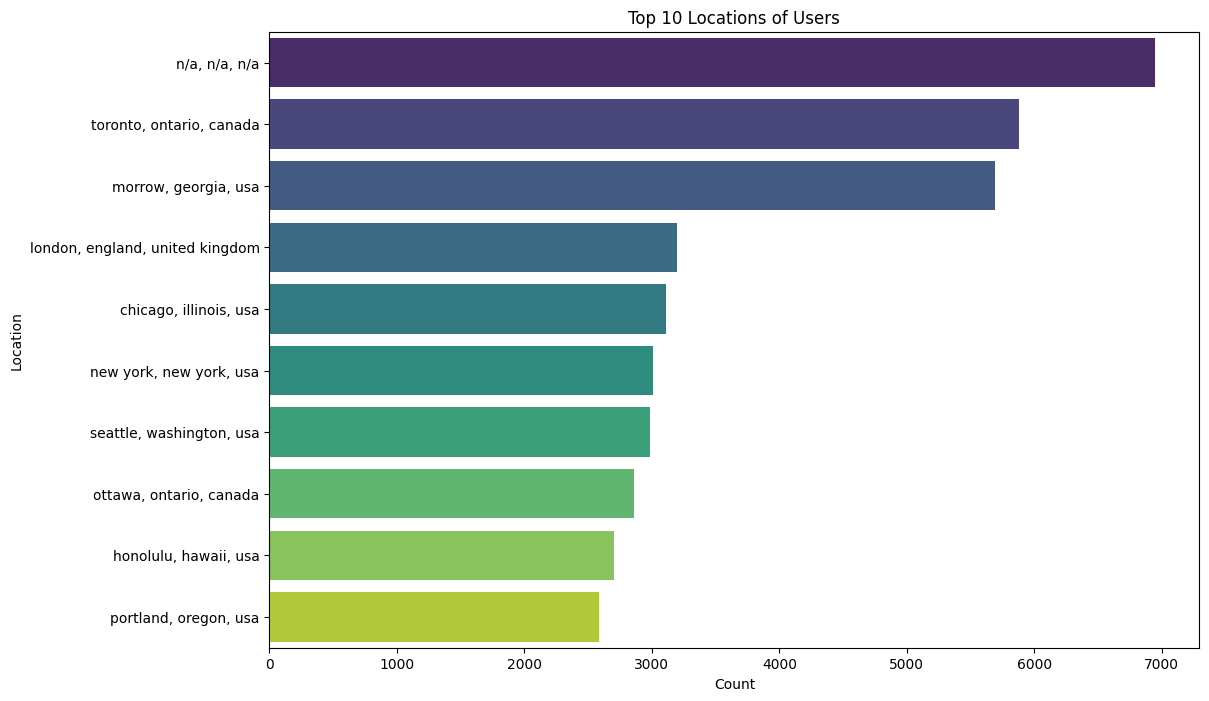

In [ ]:

# Plotting the distribution of 'Location'
plt.figure(figsize=(12, 8))
sns.countplot(y='Location', data=rating_books_with_user, order=rating_books_with_user['Location'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Locations of Users')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

# **Bivariate analysis**

In [ ]:
rating_books_with_user.head(1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Location,Age,title_length
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",32.0,12


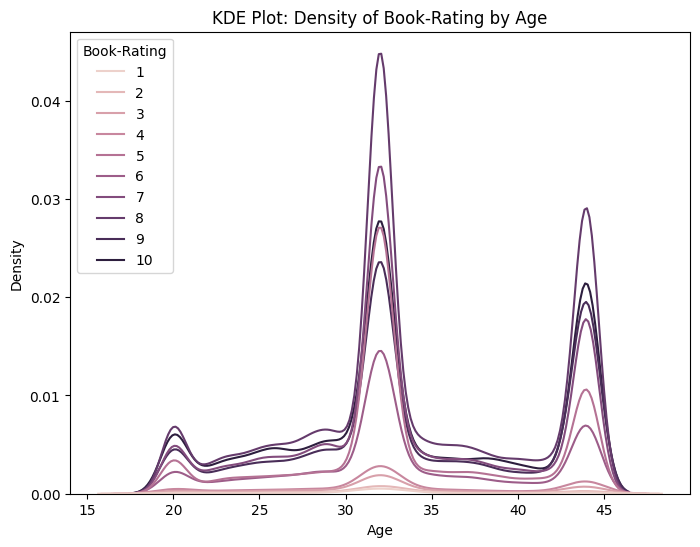

In [ ]:
# KDE Plot: Kernel Density of Book-Rating by Age
plt.figure(figsize=(8, 6))
sns.kdeplot(x='Age', hue='Book-Rating', data=rating_books_with_user)
plt.title('KDE Plot: Density of Book-Rating by Age')
plt.show()


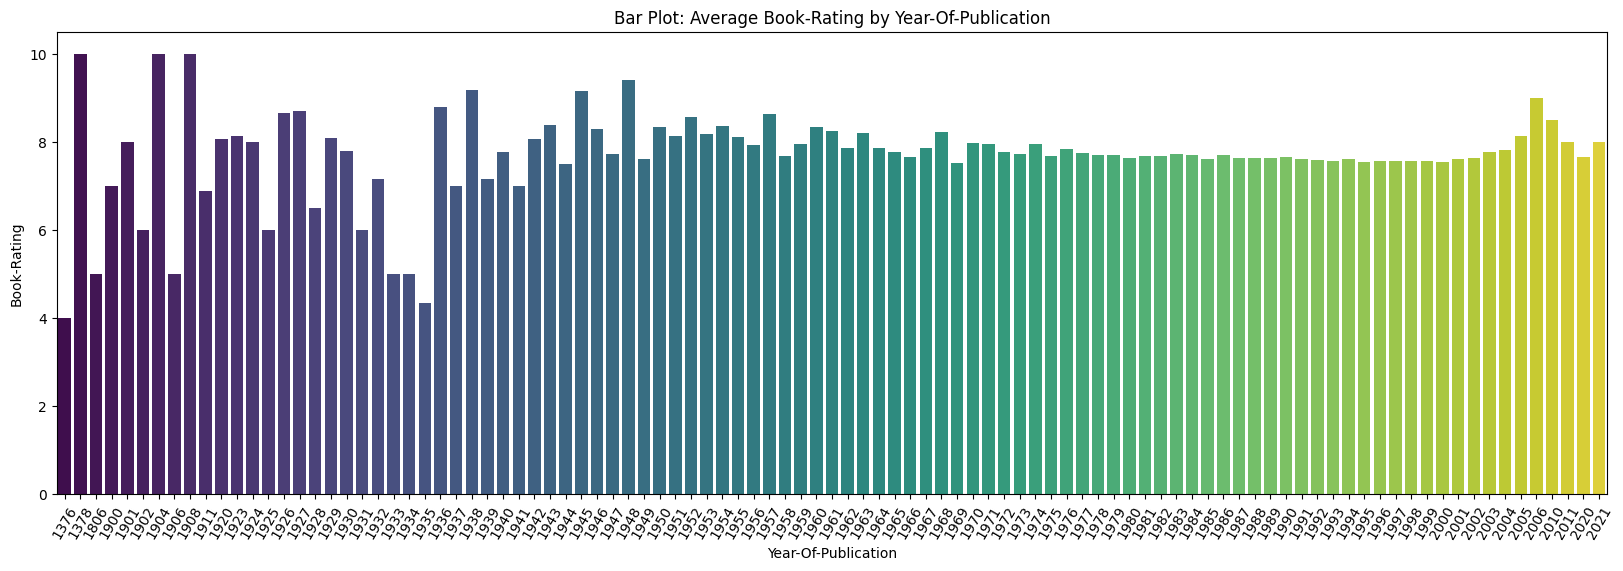

In [ ]:
palette = sns.color_palette("viridis", n_colors=len(rating_books_with_user['Year-Of-Publication'].unique()))

# Bar Plot: Average Book-Rating by Year-Of-Publication with different colors
plt.figure(figsize=(20, 6))
sns.barplot(x='Year-Of-Publication', y='Book-Rating', data=rating_books_with_user, ci=None, palette=palette)
plt.title('Bar Plot: Average Book-Rating by Year-Of-Publication')
plt.xticks(rotation=60)
plt.show()

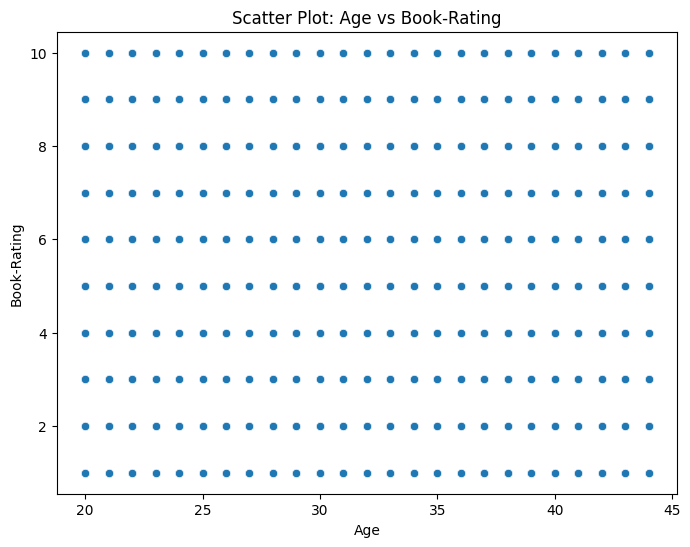

In [ ]:
# 1. Scatter Plot: Age vs Book-Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Book-Rating', data=rating_books_with_user)
plt.title('Scatter Plot: Age vs Book-Rating')
plt.show()


# Popularity Based Approach
The main idea behind Popularity Based Approach is to recomend the books which are popular , the popularity can be calculated on the basis of ratings

In [ ]:
def popularity_approach(df,number_of_top_book=50):
    # first we have groupy with Book-Ttle and Book-rating as we wou recomend popularity on the these columns
    rating_counts=df.groupby("Book-Title").count()["Book-Rating"].reset_index()
    # counting the number of ratings that particular book-title has got
    rating_counts.rename(columns={"Book-Rating":"num_of_ratings"},inplace=True)

    # calculating average rating
    rating_avg=df.groupby("Book-Title")["Book-Rating"].mean().reset_index()
    rating_avg.rename(columns={"Book-Rating":"average_rating"},inplace=True)

    df_popular_books=rating_counts.merge(rating_avg,on="Book-Title")

    # average rating can be misguiding as they may be baised to number of ratings
    # so taking account of number of ratings for particular book-title
    # therefore  creating a function for calculating meaningfull average rating
    mean_avg_rating=df_popular_books["average_rating"].mean()
    total_ratings=df_popular_books["num_of_ratings"].quantile(0.90)
    def weighted_rate(df):
        number_of_rating_vector=df["num_of_ratings"]
        average_rating_vector=df["average_rating"]

        return ((number_of_rating_vector*average_rating_vector) + (total_ratings*mean_avg_rating)) / (number_of_rating_vector+total_ratings)


    # checking only for books which got more than
    df_popular_books=df_popular_books[df_popular_books["num_of_ratings"] >=100]
    # calculating popularity of books using weighted_rate
    df_popular_books["popularity"]=df_popular_books.apply(weighted_rate,axis=1)
    # sorting the books by its popularity in decending order
    df_popular_books=df_popular_books.sort_values(by="popularity",ascending=False)
    # returning the top n books
    return df_popular_books[["Book-Title","num_of_ratings","average_rating","popularity"]].reset_index(drop=True).head(number_of_top_book)


In [ ]:

# top 20 popular books
top_20=pd.DataFrame(popularity_approach(rating_books_with_user,20))
top_20


,Book-Title,num_of_ratings,average_rating,popularity
0,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882,9.266764
1,"The Return of the King (The Lord of the Rings,...",103,9.213592,9.135313
2,Harry Potter and the Goblet of Fire (Book 4),247,9.125506,9.093705
3,Harry Potter and the Sorcerer's Stone (Book 1),176,9.062500,9.019966
4,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,9.016361
5,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393,9.012101
6,To Kill a Mockingbird,267,8.977528,8.950786
7,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,8.914418
8,Ender's Game (Ender Wiggins Saga (Paperback)),151,8.920530,8.875729
9,The Fellowship of the Ring (The Lord of the Ri...,205,8.882927,8.850542


## Collaborative Filtering Approaches
In Collaborative Filtering we make predictions of the taste or the intrests of the user based based on the other similar users behaviour (which is called collaborative) .The simple understanding is that if a person P1 have similar opinion with person P2 , then if person P1 is reading Harry Potter books then person P2 may also read Harry Potter books

Collaborative Filtering has mainly two implimentaion strategies



*   Model Based
*   Memory Based


we will use following approaches




*   User_based Collaborative Filtering and
*   Item_based Collaborative Filtering
*  Content Based Filtering




Model based Collaborative Filtering Approach


  

*   Singular value decomposition(SVD)
*   Non-Negetive Matrix Factorisation(NMF)





## User Based Collaborative Filtering

In this technique we try to predict on basis of what user may like based on the ratings that they had given to the items. In simpe words here we try to indentify the neghbouring users on the basis of similarity of active users and then scoring of the items is calculated on the basis of those neighbour users

In [ ]:
# Drop users who have given less number of votings
# we will drop the users where the number of votes are less than 100
new_df=rating_books_with_user[rating_books_with_user['User-ID'].map(rating_books_with_user['User-ID'].value_counts()) > 100]

# creating a pivot tables consisting user realted information
users_info=new_df.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
users_info.fillna(0,inplace=True)


In [ ]:
users_info.head(3)

Book-Title,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Dark Justice,Final Fantasy Anthology: Official Strategy Guide (Brady Games),"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",Highland Desire (Zebra Splendor Historical Romances),"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),Nonbook Materials: The Organization of Integrated Collections,"Q-Space (Star Trek The Next Generation, Book 47)","Q-Zone (Star Trek The Next Generation, Book 48)",...,termcap &amp; terminfo (O'Reilly Nutshell),the Dark Light Years,them (Modern Library),together by christmas,"wet sand, raven tracks",whataboutrick.com: a poetic tribute to Richard A. Ricci,"Â¡Corre, perro, corre!",Â¿Eres tu mi mamÃ¡?/Are You My Mother?,Ã?ngeles fugaces (Falling Angels),Ã?Â?ber das Fernsehen.
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def choice_of_users(id):

    user_favourite=new_df[new_df["User-ID"]==id].sort_values(["Book-Rating"],ascending=False)[0:10]
    return user_favourite

def user_based_collaborative(new_df,user_id):
    if user_id not in new_df["User-ID"].values:
        print("USER NOT FOUND")


    else:
        user_index=np.where(users_info.index==user_id)[0][0]
        similar=cosine_similarity(users_info)
        similar_users_list=list(enumerate(similar[user_index]))
        similar_users_list = sorted(similar_users_list,key = lambda x:x[1],reverse=True)[0:10]

        record_of_users=[]

        for ind in similar_users_list:
                data=rating_books_with_user[rating_books_with_user["User-ID"]==users_info.index[ind[0]]]
                record_of_users.extend(list(data.drop_duplicates("User-ID")["User-ID"].values))

    return record_of_users

def common(df,users_list,user_id):
    temp1=new_df[df["User-ID"]==user_id]
    suggested_books=[]
    users_list=list(users_list)
    for id in users_list:
        temp2=df[(df["User-ID"]==id)]
        all_books=temp2.loc[~temp2["Book-Title"].isin(temp1["Book-Title"]),:]
        all_books=all_books.sort_values(["Book-Rating"],ascending=False)[0:10]
        suggested_books.extend(all_books["Book-Title"].values)

    return suggested_books[0:10]


In [ ]:
# taking any random user_id
import random # import the random module
random_user_id=random.choice(new_df["User-ID"].values)
# showing users choice based on history
user_choice=pd.DataFrame(choice_of_users(random_user_id))
# subseting users favourite from users choice
user_favorite=choice_of_users(random_user_id)
n=len(user_choice["Book-Title"].values)
print(f"USER: {random_user_id} ")

USER: 109574 


In [ ]:
user_favorite


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Location,Age,title_length
123162,0060976845,Little Altars Everywhere: A Novel,Rebecca Wells,1996,Perennial,http://images.amazon.com/images/P/0060976845.0...,109574,10,"edmonton, alberta, canada",44.0,33
123263,0721641318,Saunders tests for self-evaluation of nursing ...,Dee Ann Gillies,1973,Saunders,http://images.amazon.com/images/P/0721641318.0...,109574,10,"edmonton, alberta, canada",44.0,56
123277,0814614221,"Amos, Hosea, Micah, Nahum, Zephaniah, Habakkuk...",Carroll Stuhlmueller,1986,Liturgical Press,http://images.amazon.com/images/P/0814614221.0...,109574,10,"edmonton, alberta, canada",44.0,98
123276,0814614213,"Jeremiah, Baruch (Collegeville Bible Commentar...",Peter F. Ellis,1986,Liturgical Press,http://images.amazon.com/images/P/0814614213.0...,109574,10,"edmonton, alberta, canada",44.0,68
123275,0814614191,"First Maccabees, Second Maccabees (Collegevill...",Alphonse P. Spilly,1985,Liturgical Press,http://images.amazon.com/images/P/0814614191.0...,109574,10,"edmonton, alberta, canada",44.0,82
123274,0814614183,Ezra Nehemiah (Collegeville Bible Commentary O...,Rita J. Burns,1985,Liturgical Press,http://images.amazon.com/images/P/0814614183.0...,109574,10,"edmonton, alberta, canada",44.0,62
123273,0814614175,"First Chronicles, Second Chronicles (Collegevi...",Alice L. Laffey,1985,Liturgical Press,http://images.amazon.com/images/P/0814614175.0...,109574,10,"edmonton, alberta, canada",44.0,87
123272,0814614167,"First Kings, Second Kings (Collegeville Bible ...",Alice L. Laffey,1985,Liturgical Press,http://images.amazon.com/images/P/0814614167.0...,109574,10,"edmonton, alberta, canada",44.0,76
123271,0814614159,"First Samuel, Second Samuel (Collegeville Bibl...",Paula J. Bowes,1985,Liturgical Press,http://images.amazon.com/images/P/0814614159.0...,109574,10,"edmonton, alberta, canada",44.0,78
123270,0814614140,"Joshua, Judges (Collegeville Bible Commentary....",John A. Grindel,1985,Liturgical Press,http://images.amazon.com/images/P/0814614140.0...,109574,10,"edmonton, alberta, canada",44.0,65


In [ ]:
# import the module
!pip install scikit-learn
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
# getting user based data for particular random user id
user_based=user_based_collaborative(new_df,random_user_id)
# getting recomended books for that particular random user id
book_suggesions_user=common(new_df,user_based,random_user_id)
# ceating a dataframe to store the results
book_suggesions_user=pd.DataFrame(book_suggesions_user,columns=["Book-Title"])
book_suggesions_user

,Book-Title
0,Come Love a Stranger
1,The Crimson Petal and the White
2,A Season Beyond a Kiss
3,Outlander
4,The Man Who Folded Himself
5,Dreams of Trespass: Tales of a Harem Girlhood
6,What Girls Learn
7,The Pilot's Wife : A Novel
8,What We Keep : A Novel (Ballantine Reader's Ci...
9,Orchard : A Novel


# Item Based Collaborative Filtering
In Item based collaborative filtering we try to find similar items based on the items whichs user has liked or interacted with .It suggests an item based on items the user has previously consumed. It looks for the items the user has consumed then it finds other items similar to consumed items and recommends accordingly

In [ ]:
rating_books_with_user.head(1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Location,Age,title_length
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",32.0,12


In [ ]:
def item_based_approach(data,querry_bookTitle,number_of_suggesions):
    querry_bookTitle=str(querry_bookTitle)

    if querry_bookTitle in data["Book-Title"].values:
        count_rating=pd.DataFrame(data["Book-Title"].value_counts())
        # seperating rare books
        # Access the first column of count_rating, which contains the counts
        # Assuming the column name is 'Book-Title' after value_counts() - adjust if necessary
        rare=count_rating[count_rating.iloc[:, 0] <= 100].index
        # defining common books
        # as those books which are not rare are common books
        common_b=data[~data["Book-Title"].isin(rare)]

        # If the qerry book title is very rare then we would suggest the most common books
        if querry_bookTitle in rare:
            # storing most common books
            ran5=pd.Series(common_b["Book-Title"].unique()).sample(5).values
            print("No hard recomendation for this book can be suggested")
            print("but you can try with most common books ")
            # suggesting randomly 5 books from set of common books
            print(f"1st {ran5[0]}")
            print(f"2nd {ran5[1]}")
            print(f"3rd {ran5[2]}")
            print(f"4th {ran5[3]}")
            print(f"5th {ran5[4]}")
        else:
            common_b_pivot=common_b.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
            # defining book-title as t
            t=common_b_pivot[querry_bookTitle]
            # making suggesions based on the correlation
            suggesion_df=pd.DataFrame(common_b_pivot.corrwith(t).sort_values(ascending=False)).reset_index(drop=False)

            if querry_bookTitle in [ele for ele in suggesion_df["Book-Title"]]:
                suggesion_df=suggesion_df.drop(suggesion_df[suggesion_df["Book-Title"]==querry_bookTitle].index[0])

            less_rating=[]
            for ele in suggesion_df["Book-Title"]:
                if data[data["Book-Title"]==ele]["Book-Rating"].mean() < 5:
                    less_rating.append(ele)
            if suggesion_df.shape[0] - len(less_rating) > 5:
                suggesion_df=suggesion_df[~suggesion_df["Book-Title"].isin(less_rating)]

            suggesion_df=suggesion_df[0:number_of_suggesions]
            suggesion_df.columns=["Book-Title","Correlation"]

            return suggesion_df

    else:
        print("No Results Found  !!!")

In [ ]:
# getting top 10 suggesions from item-based approach
item_based_approach(rating_books_with_user,"The Da Vinci Code",10)

,Book-Title,Correlation
0,Silence of the Lambs,1.000000
2,Dance upon the Air (Three Sisters Island Trilogy),1.000000
3,Unnatural Exposure,0.946118
4,The Divine Secrets of the Ya-Ya Sisterhood: A ...,0.943242
5,The Smoke Jumper,0.896258
6,Four Blind Mice,0.887437
7,Back Roads,0.883452
8,"Girl, Interrupted",0.877346
9,The Hitchhiker's Guide to the Galaxy,0.857690
10,Pop Goes the Weasel,0.850640


In [ ]:

# when the book title is not present
item_based_approach(rating_books_with_user,"machine learning",10)

No Results Found  !!!


**Content based**

In Content based Filtering approach we recomend item to the users based on the content we have about the history of users. We recomend similar books based what other books that particular user has read.In simple words based on what we like ,the algorithm will simply pick the items with similar content to recomend us.



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_approach(data, querry_bookTitle, number_of_books):
    querry_bookTitle = str(querry_bookTitle)

    # Check if 'Book-Title' column exists in the DataFrame
    if 'Book-Title' not in data.columns:
        print("Error: 'Book-Title' column not found in the DataFrame.")
        return []  # Return an empty list to avoid further errors

    if querry_bookTitle in data["Book-Title"].values:
        # Using 'Book-Title' as the index for value_counts
        count_rating = pd.DataFrame(data["Book-Title"].value_counts().rename('count')).reset_index()
        count_rating.rename(columns={'index': 'Book-Title'}, inplace=True) # rename the index colum to 'Book-Title'
        # seperating rare books
        rare = count_rating[count_rating["count"] <= 100]["Book-Title"] #  use 'count' column instead of 'Book-Title'
        # defining common books
        # as those books which are not rare are common books
        common_b = data[~data["Book-Title"].isin(rare)]

     # If the qerry book title is very rare then we would suggest the most common books
        if querry_bookTitle in rare:
            # storing most common books
            ran5=pd.Series(common_b["Book-Title"].unique()).sample(5).values
            print("No hard recomendation for this book can be suggested")
            print("but you can try with most common books ")
            # suggesting randomly 5 books from set of common books
            print(f"1st {ran5[0]}")
            print(f"2nd {ran5[1]}")
            print(f"3rd {ran5[2]}")
            print(f"4th {ran5[3]}")
            print(f"5th {ran5[4]}")
        else:
            #first we drop the dulplicates Book Title
            common_b=common_b.drop_duplicates(subset=["Book-Title"])
            common_b.reset_index(inplace=True)
            # setting the index to length of unique common books
            common_b["index"]=[ele for ele in range(common_b.shape[0])]
            # taking content based book-title , book-Author and publisher
            list_of_targets=["Book-Title","Book-Author","Publisher"]
            common_b["all_features"] = [" ".join(common_b[list_of_targets].iloc[ele,].values) for ele in range(common_b[list_of_targets].shape[0])]
            # transfforming into vectorized form
            vectorizer=CountVectorizer()
            common_booksVector=vectorizer.fit_transform(common_b["all_features"])
            # finding similarity based on book-title , book-Author and publisher
            similar=cosine_similarity(common_booksVector)
            index=common_b[common_b["Book-Title"]==querry_bookTitle]["index"].values[0]
            similar_books_list=list(enumerate(similar[index]))
            similar_books_sorted=sorted(similar_books_list,key=lambda ele:ele[1],reverse=True)[1:number_of_books+1]
            suggested_books=[]
            for ele in range(len(similar_books_sorted)):

                suggested_books.append(common_b[common_b["index"]==similar_books_sorted[ele][0]]["Book-Title"].item())
            return suggested_books
    else:
        print(" COULD NOT FIND THE CONTENT")

In [ ]:
content_based_approach(rating_books_with_user,'The Da Vinci Code',10)

['Angels &amp; Demons',
 'The Firm',
 'The Client',
 'The Partner',
 'The Rainmaker',
 'The Pelican Brief',
 'The Chamber',
 'The Hobbit : The Enchanting Prelude to The Lord of the Rings',
 'The Return of the King (The Lord of the Rings, Part 3)',
 'The Fellowship of the Ring (The Lord of the Rings, Part 1)']

**Model Based Approach**

Singular Value Decomposition (SVD), is a popular method in field of Data Science and Machine Learning .It is a classical method from the Linear Algebra concept. It is popular beacuse of its properties and its use in Recomendation System. We can use this in recomending Books, movies etc.

SVD is a method from linear algebra that has been generally used as a dimensionality reduction technique in ML problems. It is a matrix Factorisation technique which tries to reduce the number of feature or attributes by reducing the sapce dimension from N dimension to I dimension.SVD is used as a collaborative filtering technique in recomendation technique domain. It consist of a matrix structure where the rows define the users and columns defines the item.

In [ ]:
! pip install surprise
from scipy.sparse.linalg import svds
# for plotting graphs
import matplotlib.pyplot as plt

from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357279 sha256=cb2cc6047cc808b7b525877cac958e56cbc499080d82a62b6669f13f9a46e356
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
# cosidering valid ratings only
df_ratings=rating_df[rating_df['Book-Rating'] != 0]


df_merge=pd.merge(users_df, df_ratings, on="User-ID")

df_merge=pd.merge(df_merge,books_df, on="ISBN")

In [ ]:

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383840 entries, 0 to 383839
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              383840 non-null  int64  
 1   Location             383840 non-null  object 
 2   Age                  383840 non-null  float64
 3   ISBN                 383840 non-null  object 
 4   Book-Rating          383840 non-null  int64  
 5   Book-Title           383840 non-null  object 
 6   Book-Author          383840 non-null  object 
 7   Year-Of-Publication  383840 non-null  int64  
 8   Publisher            383840 non-null  object 
 9   Image-URL-S          383840 non-null  object 
 10  Image-URL-M          383840 non-null  object 
 11  Image-URL-L          383840 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 35.1+ MB


In [ ]:
df_merge.drop(['Image-URL-M','Image-URL-S','Image-URL-L'],axis=1,inplace=True)

In [ ]:
df_merge.isnull().sum()


,0
User-ID,0
Location,0
Age,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0


In [ ]:

# ML Model - 1 Implementation
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_merge[['User-ID', 'ISBN', 'Book-Rating']], reader)
# Fit the Algorithm
svd_default = SVD()
results_svd = cross_validate(svd_default, data, cv=3)
pd.DataFrame(results_svd).mean()
# Predict on the model

,0
test_rmse,1.642813
test_mae,1.269734
fit_time,14.109029
test_time,1.703099


In [ ]:

#implimentation of NMF
nmf = NMF()
results_nmf = cross_validate(nmf, data, cv=3)
pd.DataFrame(results_nmf).mean()


,0
test_rmse,2.481170
test_mae,2.062209
fit_time,33.215536
test_time,1.620344


In [ ]:

# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'n_factors': [60,50],
              'n_epochs': [6, 16],
              'lr_all': [0.01, 0.001],
              'reg_all': [0.1, 0.9]}

opt_svd = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
opt_svd.fit(data)

print(opt_svd.best_score['rmse'])
print(opt_svd.best_params['rmse'])

1.6339622741654989
{'n_factors': 50, 'n_epochs': 16, 'lr_all': 0.01, 'reg_all': 0.1}


In [ ]:

# Spliting the dataset in train teat and predict
train, test = train_test_split(data, test_size=0.2)
best_params=opt_svd.best_params['rmse']
optimized_svd = SVD(n_factors=best_params['n_factors'], n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])
optimized_svd.fit(train)
pred = optimized_svd.test(test)

In [ ]:
results_svd = cross_validate(optimized_svd, data, cv=3)
pd.DataFrame(results_svd).mean()

,0
test_rmse,1.633532
test_mae,1.265389
fit_time,4.566924
test_time,2.071090


In [ ]:
# To see predictions
df_pred = pd.DataFrame(pred, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(10)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
2938,39773,0394873351,5.0,8.425845,False,8.0,3.425845
17176,147166,0586033289,10.0,7.050830,False,7.0,2.949170
62009,51883,0890816530,10.0,8.769788,False,9.0,1.230212
40837,98741,0517884518,10.0,7.805829,False,8.0,2.194171
14127,194126,9839177028,5.0,6.836350,False,7.0,1.836350
38617,235527,0671001132,8.0,8.292568,False,8.0,0.292568
37494,135367,3453021959,10.0,7.245557,False,7.0,2.754443
71286,203001,042516828X,8.0,7.775663,False,8.0,0.224337
21633,69971,0312423772,10.0,6.584653,False,7.0,3.415347
14304,76942,0316569321,6.0,7.013563,False,7.0,1.013563
